## **Library Imports:** *The code begins by importing necessary libraries for data handling, modeling, and visualization.*

In [1]:
# Importing required libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.datasets import load_diabetes  # To load the diabetes dataset
from sklearn.linear_model import LinearRegression  # For creating a linear regression model
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model's performance


## **Data Loading:** *It loads the diabetes dataset and separates it into features (X) and target variable (Y). Each feature represents a different health measure.*

In [2]:
# Loading the sklearn diabetes dataset
X, Y = load_diabetes(return_X_y=True)
# Here, X contains the independent features (inputs) and Y contains the target variable (output)


# **DataFrame Creation:** *A pandas DataFrame is created for easier data manipulation and analysis, including descriptive statistics.*

In [3]:
# Creating a DataFrame for better data analysis
df = pd.DataFrame(X, columns=load_diabetes().feature_names)  # Create a DataFrame with feature names
df['target'] = Y  # Add the target variable to the DataFrame


## **Data Exploration:** *Various DataFrame methods (like info(), head(), describe(), etc.) are used to understand the dataset's structure, types, and potential missing values.*

In [4]:
# Displaying the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)  # Shows the number of rows and columns


Shape of the DataFrame: (442, 11)


In [5]:
# Displaying information about the DataFrame
df.info()  # Gives a summary of the DataFrame, including data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
# Displaying the first few rows of the DataFrame
print("First 5 rows of the DataFrame:\n", df.head())  # Shows the first 5 entries of the DataFrame


First 5 rows of the DataFrame:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [7]:
# Describing the statistical properties of the DataFrame
print("Statistical description of the DataFrame:\n", df.describe())  # Provides statistics like mean, std, min, and max


Statistical description of the DataFrame:
                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4

In [8]:
# Displaying the column names of the DataFrame
print("Column names:", df.columns)  # Lists all the column names


Column names: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


In [9]:
# Displaying the data types of each column
print("Data types of each column:\n", df.dtypes)  # Shows the data types of each column


Data types of each column:
 age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [10]:
# Checking for missing values in the DataFrame
print("Missing values in each column:\n", df.isnull().sum())  # Counts the number of missing values in each column


Missing values in each column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


## **Feature Selection:** *The code selects a single feature (BMI) for simplicity, which is often the case when starting with linear regression.*

In [11]:
# Taking only one feature to perform simple linear regression
X = X[:, 8].reshape(-1, 1)  # Selecting only one feature (the 9th column, BMI) and reshaping it


## **Train-Test Split:** *The dataset is divided into training and testing subsets. This is important to evaluate how well the model performs on unseen data.*

In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
# 70% of data will be used for training and 30% for testing. random_state ensures reproducibility.


## **Model Creation and Training:** *A linear regression model is instantiated and trained using the training data.*

In [13]:
# Creating an instance for the linear regression model of sklearn
lr = LinearRegression()  # Instantiate the linear regression model

In [14]:

# Training the model by fitting it to the training data
lr.fit(X_train, Y_train)  # Fit the model using the training data


LinearRegression()

## **Predictions:** *The trained model is used to predict the target variable for the test data.*

In [15]:
# Making predictions using the test dataset
Y_pred = lr.predict(X_test)  # Generate predictions for the unseen test data


In [16]:
# Displaying the coefficients of the regression model
print("\nValue of the coefficients: \n", lr.coef_)  # Shows the slope of the regression line



Value of the coefficients: 
 [875.72295475]


## **Model Evaluation:** *The model's performance is assessed using Mean Squared Error (MSE) and R² score, which gives insights into the prediction accuracy and how much variance in the target variable is explained by the model.*

In [17]:
# Calculating and displaying the mean squared error (MSE)
print(f"Mean square error: {mean_squared_error(Y_test, Y_pred)}")  # Measures average squared difference between actual and predicted values


Mean square error: 4254.615583911326


In [18]:
# Calculating and displaying the R-squared score (coefficient of determination)
print(f"Coefficient of determination (R²): {r2_score(Y_test, Y_pred)}")  # Indicates how well the model explains the variance of the data


Coefficient of determination (R²): 0.3276174567207636


## **Visualization:** *Finally, the actual vs. predicted values are plotted. The scatter plot displays the actual data, while the regression line indicates the model's predictions.*

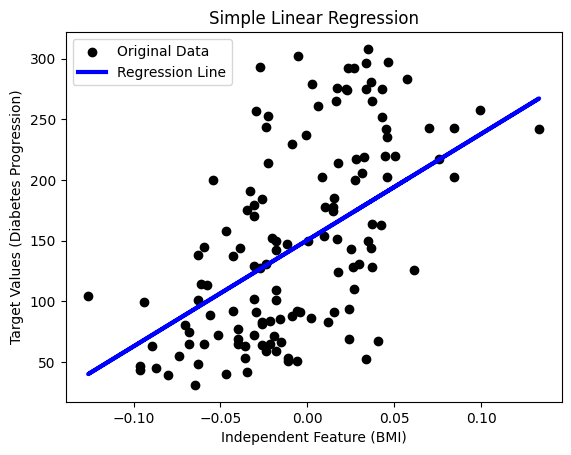

In [19]:
# Plotting the output
plt.scatter(X_test, Y_test, color="black", label="Original Data")  # Scatter plot of actual values
plt.plot(X_test, Y_pred, color="blue", linewidth=3, label="Regression Line")  # Line plot of predicted values
plt.xlabel("Independent Feature (BMI)")  # Label for x-axis
plt.ylabel("Target Values (Diabetes Progression)")  # Label for y-axis
plt.title("Simple Linear Regression")  # Title of the plot
plt.legend()  # Show legend to distinguish data and regression line
plt.show()  # Display the plot